In [58]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('LargeMovieDataset.csv')#')  # Replace with your dataset path
print(data.head())

# Preprocessing
# Select relevant features
features = data[['Genre', 'Rating', 'Popularity']]

   MovieID               Title        Genre  Rating  Popularity
0        1      Chaos Theory 1       Horror     3.5          93
1        2      Mystic Falls 2       Sci-Fi     3.4          34
2        3        The Legend 3       Horror     4.2          74
3        4      Chaos Theory 4  Documentary     2.2          59
4        5  Infinite Horizon 5       Sci-Fi     3.7          77


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MovieID     10000 non-null  int64  
 1   Title       10000 non-null  object 
 2   Genre       10000 non-null  object 
 3   Rating      10000 non-null  float64
 4   Popularity  10000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 390.8+ KB


In [44]:
data.dropna(inplace=True)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40733 entries, 0 to 40735
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         40733 non-null  object 
 1   genre         40733 non-null  object 
 2   popularity    40733 non-null  float64
 3   vote_average  40733 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.6+ MB


In [60]:

# Convert categorical data (Genre) to numerical using one-hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
genre_encoded = encoder.fit_transform(data[['Genre']]).toarray()
genre_columns = encoder.get_feature_names_out(['Genre'])

20

In [61]:

# Create a new DataFrame for encoded genres
genre_df = pd.DataFrame(genre_encoded, columns=genre_columns)

# Combine encoded genres with numerical features
processed_data = pd.concat([genre_df, data[['Rating', 'Popularity']]], axis=1)

In [62]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Genre_Action       10000 non-null  float64
 1   Genre_Adventure    10000 non-null  float64
 2   Genre_Comedy       10000 non-null  float64
 3   Genre_Documentary  10000 non-null  float64
 4   Genre_Drama        10000 non-null  float64
 5   Genre_Fantasy      10000 non-null  float64
 6   Genre_Horror       10000 non-null  float64
 7   Genre_Romance      10000 non-null  float64
 8   Genre_Sci-Fi       10000 non-null  float64
 9   Genre_Thriller     10000 non-null  float64
 10  Rating             10000 non-null  float64
 11  Popularity         10000 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [63]:

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

In [55]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming original data has the variable name `data`
imputer = SimpleImputer(strategy='mean')  # Can also use 'median' or 'most_frequent'

# Convert scaled_data (NumPy array) to DataFrame using original column names
scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns)

# Apply the imputer to handle missing values
scaled_data_df = pd.DataFrame(imputer.fit_transform(scaled_data_df), columns=scaled_data_df.columns)

ValueError: Shape of passed values is (40736, 22), indices imply (40736, 4)

In [56]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming scaled_data is a NumPy array, convert it back to DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns)  # Ensure `data.columns` matches original data

# Check shape before imputation
print("Shape before imputation:", scaled_data_df.shape)

# Apply imputation
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(scaled_data_df)

# Convert back to DataFrame
scaled_data_df = pd.DataFrame(imputed_data, columns=scaled_data_df.columns)

# Check shape after imputation
print("Shape after imputation:", scaled_data_df.shape)

ValueError: Shape of passed values is (40736, 22), indices imply (40736, 4)

In [64]:

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

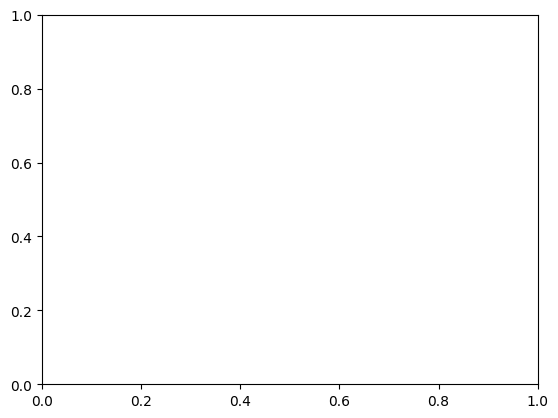

In [54]:
# Plot the Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
len(scaled_data)

43021

In [31]:
# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

ValueError: Length of values (43015) does not match length of index (43018)